In [1]:
what_were_coding = {1: "data (prepare and load)",
2: "build model",
3: "fitting the model to data (training)",
4: "making predictions and evaulating a model (inference)",
5: "saving and loading a model",
6: "putting it all together"
}
what_were_coding

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaulating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything...in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7  
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

 ### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

 Let's create a training and test set with our data

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(
        train_data = X_train,
        train_labels= y_train,
        test_data= X_test,
        test_labels= y_test,
        predictions= None        
):
    """
        Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in purple
    plt.scatter(test_data, test_labels, c="m", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show legend
    plt.legend(prop={"size":14})

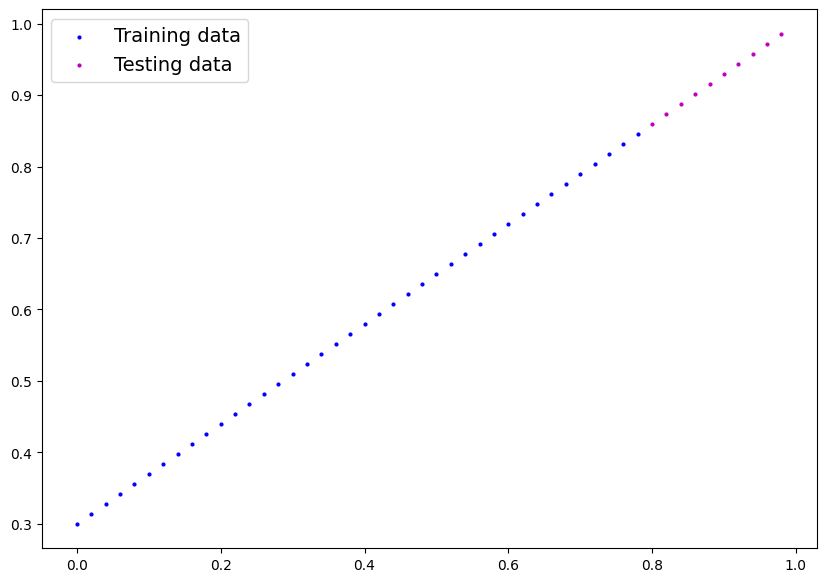

In [7]:
plot_predictions()


## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better
represent (or get closer to) the ideal values (the weight and bias values we used 
to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, 
                                                dtype=torch.float
                                                ))
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True, 
                                             dtype=torch.float
                                             ))
        
        # Forward method to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x + self.bias # this is the linear regression fromula
        